# Лабораторная работа 4

## Задание 1

Подключение библиотек

In [111]:
%matplotlib inline
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import cv2

Вспомогательные функции

In [65]:
# из RGB в яркость Y
def from_rgb_to_brightness(r, g, b):
    Y = 0.222 * r + 0.707 * g + 0.071 * b
    return Y


def beg(i, j):
     new_i, new_j = i, j
     if i < 0:
          new_i = 0
     if j < 0:
          new_j = 0
     return new_i, new_j


def end(i, j, max_i, max_j):
     new_i, new_j = i, j
     if i >= max_i:
          new_i = max_i
     if j >= max_j:
          new_j = max_j
     return new_i, new_j

In [73]:
def from_rgb_to_mono(img):
    img = Image.open(img)
    arr = np.array(img)
    arr_br = from_rgb_to_brightness(arr[:,:,0], arr[:,:,1], arr[:,:,2])
    median = np.median(arr_br)
    arr_br = np.where(arr_br < median, 0, 255)
    plt.imshow(arr_br, cmap='gray')
    plt.show()

def adaptive_from_rgb_to_mono(img, y):
    img = Image.open(img)
    arr = np.array(img)
    arr_br = from_rgb_to_brightness(arr[:,:,0], arr[:,:,1], arr[:,:,2])
    height, width = arr_br.shape
    new_arr = np.zeros((height, width))
    for i in range(height):
        for j in range(width):
            row, col = beg(i - y, j - y)
            row1, col1 = end(i + y, j + y, height, width)
            window = arr_br[row:row1 + 1, col:col1 + 1]
            median = np.median(window)
            if arr_br[i, j] < median:
                new_arr[i, j] = 0
            else:
                new_arr[i, j] = 255
    plt.imshow(new_arr, cmap='gray')
    plt.show()

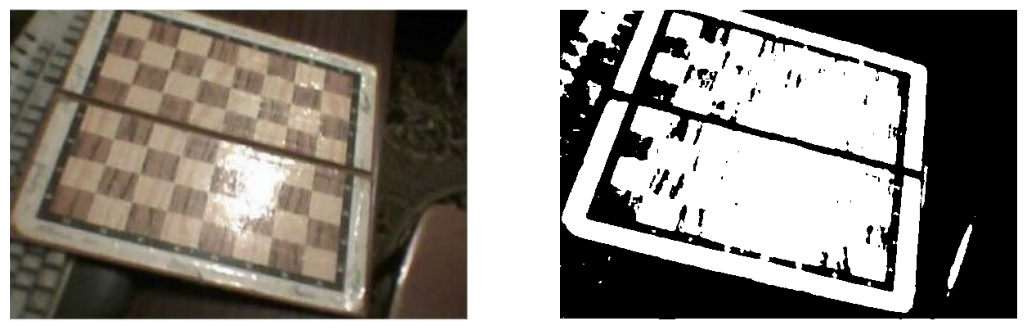

In [74]:
fig = plt.figure(figsize=(13, 13))
fig.add_subplot(1, 2, 1)
plt.imshow(np.array(Image.open("1.png")))
plt.axis('off')
fig.add_subplot(1, 2, 2)
plt.axis('off')
from_rgb_to_mono("1.png")

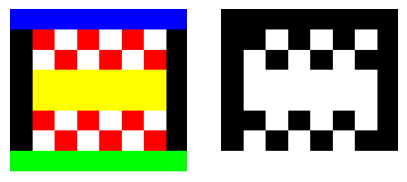

In [75]:
fig = plt.figure(figsize=(5, 5))
fig.add_subplot(1, 2, 1)
plt.imshow(np.array(Image.open("2.png")))
plt.axis('off')
fig.add_subplot(1, 2, 2)
plt.axis('off')
from_rgb_to_mono("2.png")

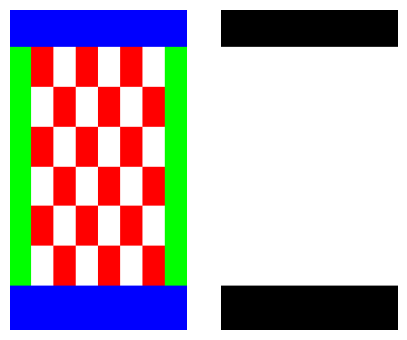

In [76]:
fig = plt.figure(figsize=(5, 5))
fig.add_subplot(1, 2, 1)
plt.imshow(np.array(Image.open("3.png")))
plt.axis('off')
fig.add_subplot(1, 2, 2)
plt.axis('off')
from_rgb_to_mono("3.png")

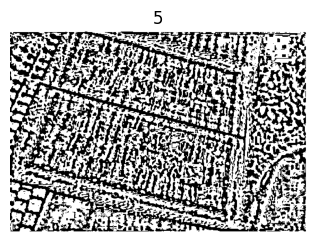

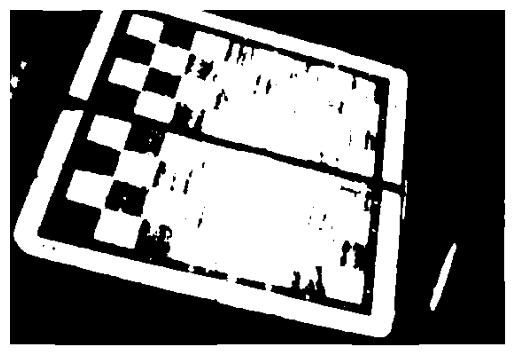

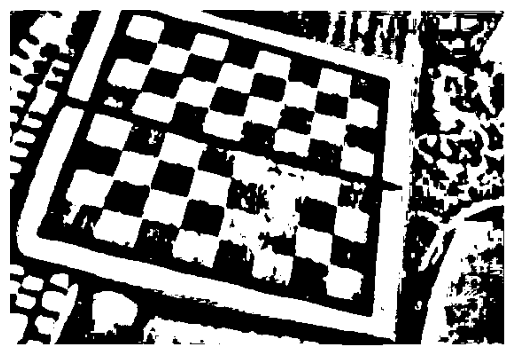

In [77]:
fig = plt.figure(figsize=(13, 13))
n1 = 5
fig.add_subplot(1, 3, 1, title=n1)
plt.axis('off')
adaptive_from_rgb_to_mono("1.png", n1)
n2 = 300
fig.add_subplot(1, 3, 2, title=n2)
plt.axis('off')
adaptive_from_rgb_to_mono("1.png", n2)
n3 = 30
fig.add_subplot(1, 3, 3, title=n3)
plt.axis('off')
adaptive_from_rgb_to_mono("1.png", n3)

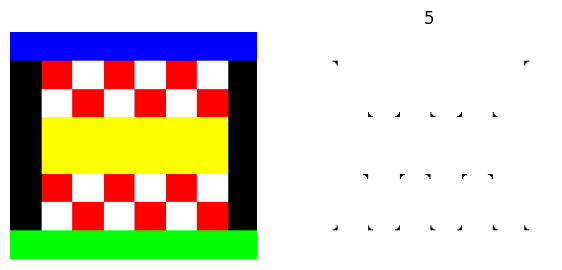

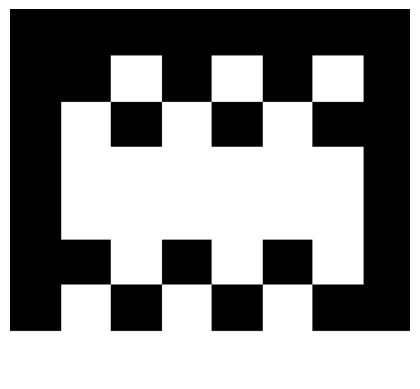

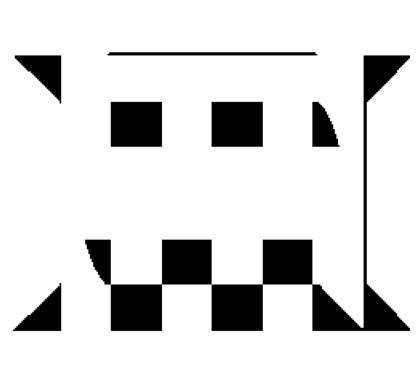

In [87]:
fig = plt.figure(figsize=(7, 7))
fig.add_subplot(2, 2, 1)
plt.imshow(np.array(Image.open("2.png")))
plt.axis('off')
n1 = 5
fig.add_subplot(2, 2, 2, title=n1)
plt.axis('off')
adaptive_from_rgb_to_mono("2.png", n1)
n2 = 200
fig.add_subplot(2, 2, 3, title=n2)
plt.axis('off')
adaptive_from_rgb_to_mono("2.png", n2)
n3 = 30
fig.add_subplot(2, 2, 4, title=n3)
plt.axis('off')
adaptive_from_rgb_to_mono("2.png", n3)

## Задание 2

In [119]:
def mean_filter(img, y):
    img = Image.open(img)
    arr = np.array(img)
    arr_br = from_rgb_to_brightness(arr[:,:,0], arr[:,:,1], arr[:,:,2])
    height, width = arr_br.shape
    new_arr = np.zeros((height, width))
    for i in range(height):
        for j in range(width):
            row, col = beg(i - y, j - y)
            row1, col1 = end(i + y, j + y, height, width)
            window = arr_br[row:row1 + 1, col:col1 + 1]
            new_arr[i, j] = np.sum(window) / y**2
    plt.imshow(new_arr, cmap="gray")

def median_filter(img, y):
    img = Image.open(img)
    arr = np.array(img)
    arr_br = from_rgb_to_brightness(arr[:,:,0], arr[:,:,1], arr[:,:,2])
    height, width = arr_br.shape
    new_arr = np.zeros((height, width))
    for i in range(height):
        for j in range(width):
            row, col = beg(i - y, j - y)
            row1, col1 = end(i + y, j + y, height, width)
            window = arr_br[row:row1 + 1, col:col1 + 1]
            new_arr[i, j] = np.median(window)
    plt.imshow(new_arr, cmap="gray")

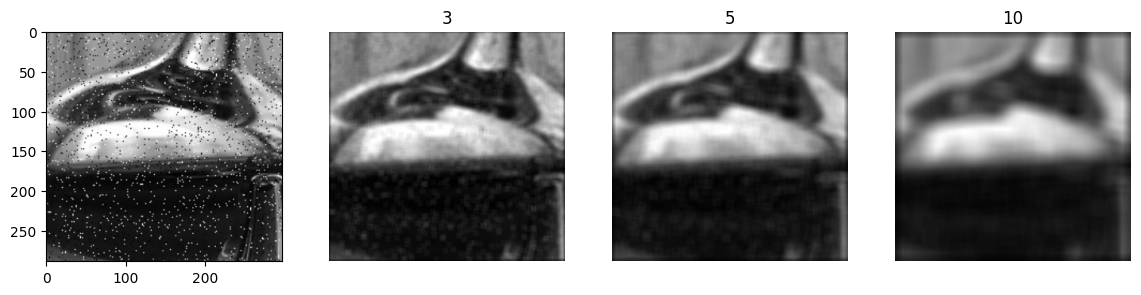

In [122]:
fig = plt.figure(figsize=(14, 14))
fig.add_subplot(1, 4, 1)
plt.imshow(np.array(Image.open("4.png")))

n1 = 3
plt.subplot(1, 4, 2, title=n1)
plt.axis('off')
mean_filter("4.png", n1)
n2 = 5
fig.add_subplot(1, 4, 3, title=n2)
plt.axis('off')
mean_filter("4.png", n2)
n3 = 10
fig.add_subplot(1, 4, 4, title=n3)
plt.axis('off')
mean_filter("4.png", n3)

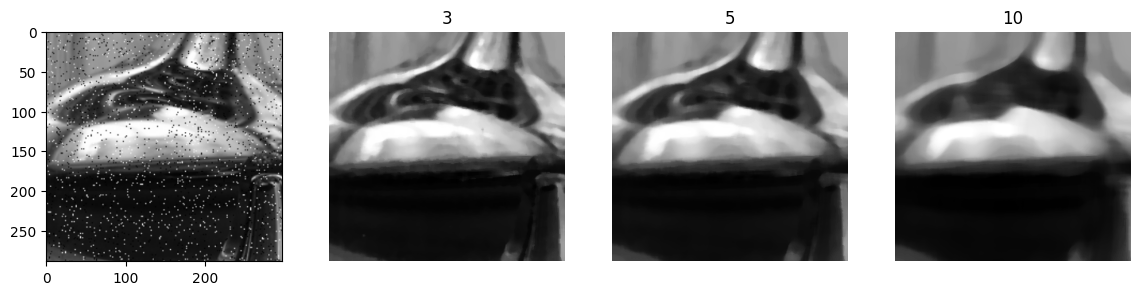

In [123]:
fig = plt.figure(figsize=(14, 14))
fig.add_subplot(1, 4, 1)
plt.imshow(np.array(Image.open("4.png")))

n1 = 3
plt.subplot(1, 4, 2, title=n1)
plt.axis('off')
median_filter("4.png", n1)
n2 = 5
fig.add_subplot(1, 4, 3, title=n2)
plt.axis('off')
median_filter("4.png", n2)
n3 = 10
fig.add_subplot(1, 4, 4, title=n3)
plt.axis('off')
median_filter("4.png", n3)

## Задание 3

In [165]:
def rotation(img, deg):
    rad = deg * np.pi / 180
    A = np.array([[1, -np.tan(rad/2)],
                  [0, 1]])
    B = np.array([[1, 0],
                  [np.sin(rad), 1]])

    img = Image.open(img)
    arr = np.array(img)
    arr_br = from_rgb_to_brightness(arr[:,:,0], arr[:,:,1], arr[:,:,2])
    height, width = arr_br.shape
    new_arr = np.zeros((height, width))
    for i in range(height):
        for j in range(width):
            new_cor = np.dot(A, np.array([j, i]))
            new_cor = np.dot(B, new_cor.T)
            new_cor = np.dot(A, new_cor.T)
            if int(new_cor[1]) < height and int(new_cor[0]) < width and int(new_cor[1]) > 0 and int(new_cor[0]) > 0:
                new_arr[i, j] = arr_br[int(new_cor[1]), int(new_cor[0])]
    plt.imshow(new_arr, cmap="gray")

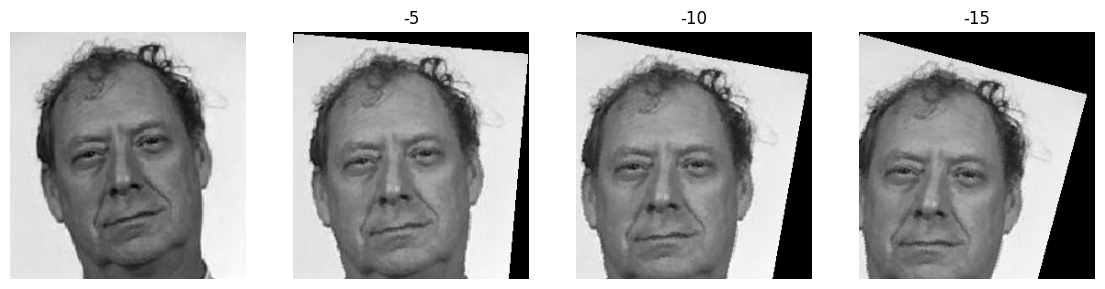

In [166]:
fig = plt.figure(figsize=(14, 14))
fig.add_subplot(1, 4, 1)
plt.axis('off')
plt.imshow(np.array(Image.open("6.png"))[:,:,1], cmap="gray")

n1 = -5
plt.subplot(1, 4, 2, title=n1)
plt.axis('off')
rotation("6.png", n1)

n2 = -10
plt.subplot(1, 4, 3, title=n2)
plt.axis('off')
rotation("6.png", n2)
n3 = -15
plt.subplot(1, 4, 4, title=n3)
plt.axis('off')
rotation("6.png", n3)
